# Fermipy and 3ML
In this Example we show how to use the fermipy plugin in threeML. We perform a Binned likelihood analysis and a Bayesian analysis of the Crab, optimizing the parameters of the Crab Pulsar (PSR J0534+2200) keeping fixed the parameters of the Crab Nebula. In the model, the nebula is described by two sources, one representing the synchrotron spectrum, the othet the Inverse Compton emission.
In this example we show how to download Fermi-LAT data, how to build a model starting from the 4FGL, how to free and fix parameters of the sources in the model, and how to perform a spectral analysis using the fermipy plugin.


In [1]:
import shutil
from IPython.display import Image,display
import glob
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits as pyfits
import numpy as np
from threeML import *
import scipy as sp
%matplotlib inline

/Users/omodei/miniconda/envs/threeML/lib/python2.7/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of K to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)
/Users/omodei/miniconda/envs/threeML/lib/python2.7/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of xc to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)

WARNING UserWarning: Using default configuration from /Users/omodei/miniconda/envs/threeML/lib/python2.7/site-packages/threeML/data/threeML_config.yml. You might want to copy it to /Users/omodei/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning

In [2]:
# Let's interrogate the 4FGL to get the sources in a radius of 20.0 deg around the Crab

lat_catalog = FermiLATSourceCatalog()

ra, dec, table = lat_catalog.search_around_source("Crab", radius=20.0)

table

Trying https://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermilpsc&


name,source_type,ra,dec,assoc_name,tevcat_assoc,Search_Offset
,,deg,deg,,,
object,str32,float64,float64,object,object,float64
4FGL J0534.5+2200,"pulsar, identified by pulsations",83.6367,22.0149,PSR J0534+2200,Crab pulsar,0.2022
4FGL J0534.5+2201s,pulsar wind nebula,83.6331,22.0199,Crab Nebula,Crab,0.3243
4FGL J0534.5+2201i,pulsar wind nebula,83.6330,22.0200,Crab Nebula,Crab,0.3304
4FGL J0526.3+2246,active galaxy of uncertain type,81.5908,22.7778,2MASS J05262938+2247232,,122.1994
4FGL J0544.4+2238,unknown,86.1093,22.6418,,,142.4913
4FGL J0521.7+2112,BL Lac type of blazar,80.4445,21.2131,TXS 0518+211,VER J0521+211,184.2435
4FGL J0536.2+1733,BL Lac type of blazar,84.0719,17.5534,TXS 0533+175,,268.8090
4FGL J0539.0+1644,active galaxy of uncertain type,84.7500,16.7432,NVSS J053855+164612,,322.5278


In [3]:
# This gets a 3ML model (a Model instance) from the table above, where every source
# in the 4FGL becomes a Source instance. Note that by default all parameters of all
# sources are fixed

model = lat_catalog.get_model()

# Let's free all the normalizations within 3 deg from the center
model.free_point_sources_within_radius(3.0, normalization_only=True)

model.display()


WARNING UserWarning: We have set the min_value of Crab_synch.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of Crab_IC.spectrum.main.Log_parabola.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of _2MASS_J05262938p2247232.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of _4FGL_J0544d4p2238.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of TXS_0518p211.spectrum.main.Log_parabola.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of TXS_0533p175.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of NVSS_J053855p164612.spectrum.main.Log_parabola.K to 1e-99 because there was a postive transform


WARNING Us


WARNING UserWarning: We have set the min_value of MG1_J043022p1655.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of NVSS_J054529p061955.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of MG2_J042948p2843.spectrum.main.Log_parabola.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of B3_0548p378B.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of B2_0441p34.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of TXS_0420p210.spectrum.main.Powerlaw.K to 1e-99 because there was a postive transform


WARNING UserWarning: We have set the min_value of _4FGL_J0435d5p3232.spectrum.main.Log_parabola.K to 1e-99 because there was a postive transform


WARNING UserW

Model summary:
==============

                    N
Point sources     133
Extended sources    0
Particle sources    0

Free parameters (5):
--------------------

                                            value    min_value    max_value  \
PSR_J0534p2200...K                    1.61768e-13  1.61768e-16  1.61768e-10   
Crab_synch.spectrum.main.Powerlaw.K    2.3083e-10   2.3083e-13   2.3083e-07   
Crab_IC.spectrum.main.Log_parabola.K      5.5e-16      5.5e-19      5.5e-13   
_2MASS_J05262938p2247232...K           1.3747e-17   1.3747e-20   1.3747e-14   
_4FGL_J0544d4p2238...K                  1.565e-16    1.565e-19    1.565e-13   

                                                unit  
PSR_J0534p2200...K                    keV-1 s-1 cm-2  
Crab_synch.spectrum.main.Powerlaw.K   keV-1 s-1 cm-2  
Crab_IC.spectrum.main.Log_parabola.K  keV-1 s-1 cm-2  
_2MASS_J05262938p2247232...K          keV-1 s-1 cm-2  
_4FGL_J0544d4p2238...K                keV-1 s-1 cm-2  

Fixed parameters (707):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

In [4]:
# but then let's fix the sync and the IC components of the Crab nebula
# (cannot fit them with just one month of data)
# (these two methods are equivalent)
model['Crab_IC.spectrum.main.Log_parabola.K'].fix = True
model.Crab_synch.spectrum.main.Powerlaw.K.fix = True

# However, let's free the index of the Crab Pulsar
model.PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index.free = True

model.display()

Model summary:
==============

                    N
Point sources     133
Extended sources    0
Particle sources    0

Free parameters (4):
--------------------

                                    value    min_value    max_value  \
PSR_J0534p2200...K            1.61768e-13  1.61768e-16  1.61768e-10   
PSR_J0534p2200...index            -1.8869          -10           10   
_2MASS_J05262938p2247232...K   1.3747e-17   1.3747e-20   1.3747e-14   
_4FGL_J0544d4p2238...K          1.565e-16    1.565e-19    1.565e-13   

                                        unit  
PSR_J0534p2200...K            keV-1 s-1 cm-2  
PSR_J0534p2200...index                        
_2MASS_J05262938p2247232...K  keV-1 s-1 cm-2  
_4FGL_J0544d4p2238...K        keV-1 s-1 cm-2  

Fixed parameters (708):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

In [6]:
# Download data from Jan 01 2010 to February 1 2010

tstart = '2010-01-01 00:00:00'
tstop = '2010-02-01 00:00:00'

# Note that this will understand if you already download these files, and will
# not do it twice unless you change your selection or the outdir

evfile, scfile = download_LAT_data(ra, dec, 20.0, 
                             tstart, tstop, time_type='Gregorian', 
                             destination_directory='Crab_data')

Existing event file /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits and Spacecraft file /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits correspond to the same selection. We assume you did not tamper with them, so we will return those instead of downloading them again. If you want to download them again, remove them from the outdir


In [7]:
# Configuration for Fermipy

config = FermipyLike.get_basic_config(evfile=evfile, scfile=scfile, ra=ra, dec=dec)

# See what we just got

config.display()

binning:
  roiwidth: 10.0
  binsz: 0.1
  binsperdec: 8
data:
  evfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits
  scfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits
selection:
  emin: 100.0
  emax: 100000.0
  zmax: 100.0
  evclass: 128
  evtype: 3
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  ra: 83.63309095468972
  dec: 22.014494786634696



binning:
 roiwidth: 10.0
 binsz: 0.1
 binsperdec: 8
data:
 evfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits
 scfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits
selection:
 emin: 100.0
 emax: 100000.0
 zmax: 100.0
 evclass: 128
 evtype: 3
 filter: DATA_QUAL>0 && LAT_CONFIG==1
 ra: 83.63309095468972
 dec: 22.014494786634696

In [8]:
# You can of course modify the configuration as a dictionary
config['selection']['emax'] = 300000.0

# and even add sections
config['gtlike'] = {'edisp': False}

config.display()

binning:
  roiwidth: 10.0
  binsz: 0.1
  binsperdec: 8
data:
  evfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits
  scfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits
gtlike:
  edisp: false
selection:
  emin: 100.0
  emax: 300000.0
  zmax: 100.0
  evclass: 128
  evtype: 3
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  ra: 83.63309095468972
  dec: 22.014494786634696



binning:
 roiwidth: 10.0
 binsz: 0.1
 binsperdec: 8
data:
 evfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits
 scfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits
gtlike:
 edisp: false
selection:
 emin: 100.0
 emax: 300000.0
 zmax: 100.0
 evclass: 128
 evtype: 3
 filter: DATA_QUAL>0 && LAT_CONFIG==1
 ra: 83.63309095468972
 dec: 22.014494786634696

In [9]:
#Let's create an instance of the plugin
# Note that here no processing is made, because fermipy still doesn't know
# about the model you want to use

LAT = FermipyLike("LAT", config)

# The plugin modifies the configuration as needed to get the output files
# in a unique place, which will stay the same as long as your selection does not change
config.display()

binning:
  roiwidth: 10.0
  binsz: 0.1
  binsperdec: 8
data:
  evfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits
  scfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits
fileio:
  outdir: __361686a17a9908dab4859dfebb7a0eb3
gtlike:
  edisp: false
selection:
  emin: 100.0
  emax: 300000.0
  zmax: 100.0
  evclass: 128
  evtype: 3
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  ra: 83.63309095468972
  dec: 22.014494786634696




WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



binning:
 roiwidth: 10.0
 binsz: 0.1
 binsperdec: 8
data:
 evfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits
 scfile: /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits
fileio:
 outdir: __361686a17a9908dab4859dfebb7a0eb3
gtlike:
 edisp: false
selection:
 emin: 100.0
 emax: 300000.0
 zmax: 100.0
 evclass: 128
 evtype: 3
 filter: DATA_QUAL>0 && LAT_CONFIG==1
 ra: 83.63309095468972
 dec: 22.014494786634696

In [10]:
data = DataList(LAT)
fermipy_output_directory = config['fileio']['outdir']
print('Fermipy Output directoty: %s' % fermipy_output_directory)
#This remove the output directory, to start a fresh analysis...
shutil.rmtree(fermipy_output_directory)
# Here is where the fermipy processing happens (the .setup method)
jl = JointLikelihood(model, data)

Fermipy Output directoty: __361686a17a9908dab4859dfebb7a0eb3

Found Galactic template for IRF. P8R2_SOURCE_V6: /Users/omodei/miniconda/envs/threeML/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



2020-04-17 12:57:53 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.17.3 
ScienceTools version unknown



Found Isotropic template for irf P8R2_SOURCE_V6: /Users/omodei/miniconda/envs/threeML/share/fermitools/refdata/fermi/galdiffuse/iso_P8R2_SOURCE_V6_v06.txt


2020-04-17 12:57:59 INFO    GTAnalysis.setup(): Running setup.
2020-04-17 12:57:59 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2020-04-17 12:57:59 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2020-04-17 12:57:59 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits outfile=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/__361686a17a9908dab4859dfebb7a0eb3/ft1_00.fits ra=83.6330909547 dec=22.0144947866 rad=7.57106781187 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=100.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2020-04-17 12:58:00 INFO    GTBinnedAnalysis.run_gtapp(): 
2020-04-17 12:58:00 INFO    GTBinnedAnalysis.run_gtapp(): WARNING: version mismatch between CFITSIO header (v3.43) and linked library (v3.41

2020-04-17 12:59:22 INFO    GTBinnedAnalysis.run_gtapp(): Using evtype=3 (i.e., FRONT/BACK irfs)
2020-04-17 12:59:22 INFO    GTBinnedAnalysis.run_gtapp(): ResponseFunctions::load: IRF used: P8R2_SOURCE_V6
2020-04-17 12:59:22 INFO    GTBinnedAnalysis.run_gtapp(): event_types:  0  1
2020-04-17 12:59:22 INFO    GTBinnedAnalysis.run_gtapp(): Computing binned exposure map....................!
2020-04-17 12:59:22 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtexpcube2. Execution time: 1.70 s
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
2020-04-17 12:59:22 INFO    GTBinnedAnalysis.run_gtapp(): Running gtsrcmaps.
2020-04-17 12:59:22 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtsrcmaps scfile=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits sctable="SC_DATA" expcube=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/__361686a17

2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named GB6_J0629p2437
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named _2MASX_J05054288p3321355
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named NVSS_J060835p114942
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named _4FGL_J0620d4p1445
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named MG2_J044950p3026
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named _4FGL_J0445d7p1535
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named PKS_0506p101
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named TXS_0628p203
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named NVSS_J045804p115142
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named B2_0437p27B
2020-04-17 13:00:24 INFO   

2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for B3_0548p378B 29....................!
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for Crab_IC 29....................!
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for Crab_synch 29....................!
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0501p3048 29....................!
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0515p1527 29....................!
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0529p0934 29....................!
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0549p3258 29....................!
2020-04-17 13:00:24 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0555p0304 29....................!
2020-04-17 13:00:24 INFO    GTBinnedA

2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0442p071 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0506p056 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0506p196 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0516p087 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0518p211 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0533p175 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0536p145 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0628p203 29....................!
2020-04-17 13:03:41 INFO    GTBinnedAnal

2020-04-17 13:04:00 INFO    GTAnalysis.setup(): Finished setup.
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for PSR_J0534p2200        : ['Prefactor']
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for Crab_synch            : ['Prefactor']
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for Crab_IC               : ['Prefactor']
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for _2MASS_J05262938p2247232: ['Prefactor']
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0544d4p2238    : ['Prefactor']
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for TXS_0518p211          : ['Prefactor']
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for TXS_0533p175          : ['Prefactor']
2020-04-17 13:04:00 INFO    GTAnalysis.free_source(): Fixing parameters for NVSS_J053855p164612   : ['Prefactor']
2020-04-17 13:04:00 IN

2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for NVSS_J054218p354149   : ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for GB6_J0623p3045        : ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0622d5p3120    : ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0540d7p3611    : ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for _1RXS_J044127d8p150455: ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0618d7p1211    : ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for MG2_J050234p3436      : ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for OG_050                : ['Prefactor']
2020-04-17 13:04:02 INFO    GTAnalysis.free_source(): Fixing parameters for PSR_J0633p17

In [11]:
jl.set_minimizer("ROOT")
res = jl.fit()


WARNING UserWarning: get_number_of_data_points not implemented, values for statistical measurements such as AIC or BIC are unreliable



Best fit values:



,result,unit
parameter,,
PSR_J0534p2200...K,(1.50 +/- 0.06) x 10^-13,1 / (cm2 keV s)
PSR_J0534p2200...index,-1.801 +/- 0.026,
_2MASS_J05262938p2247232.spectrum.main.Powerlaw.K,(0.41 -0.32 +1.4) x 10^-16,1 / (cm2 keV s)
_4FGL_J0544d4p2238.spectrum.main.Powerlaw.K,(3.9 -2.3 +6) x 10^-16,1 / (cm2 keV s)



Correlation matrix:



1.00,0.73,-0.06,-0.02
0.73,1.00,0.09,0.21
-0.06,0.09,1.00,0.03
-0.02,0.21,0.03,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
LAT,118116.776096
total,118116.776096



Values of statistical measures:



,statistical measures
AIC,236231.552191
BIC,236233.552191


In [12]:
#Now let's compute the errors on the best fit parameters
res = jl.get_errors()

,result,unit
parameter,,
PSR_J0534p2200...K,(1.50 +/- 0.06) x 10^-13,1 / (cm2 keV s)
PSR_J0534p2200...index,-1.801 +/- 0.026,
_2MASS_J05262938p2247232.spectrum.main.Powerlaw.K,(4 -4 +7) x 10^-17,1 / (cm2 keV s)
_4FGL_J0544d4p2238.spectrum.main.Powerlaw.K,(3.9 -3.3 +4) x 10^-16,1 / (cm2 keV s)


In [13]:
#We might also want to look at the profile of the likelihood for each parameter.
res = jl.get_contours(model.PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index,-2.0,-1.6,30)

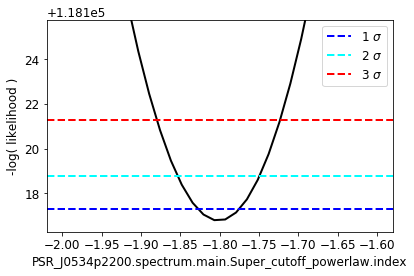

In [14]:
res[-1]

In [15]:
#Or we might want to produce a contour plot
res = jl.get_contours('PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.K',1.3e-13,1.7e-13, 20, 'PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index',-2.0,-1.6, 20)

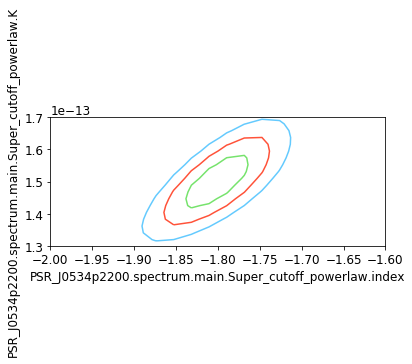

In [16]:
res[-1]

In [17]:
# We can also axcess the GTAnalysis object of fermipy:
res = jl.fit()
LAT.gta.write_roi('test',make_plots=True)

Best fit values:



,result,unit
parameter,,
PSR_J0534p2200...K,(1.50 +/- 0.06) x 10^-13,1 / (cm2 keV s)
PSR_J0534p2200...index,-1.802 +/- 0.026,
_2MASS_J05262938p2247232.spectrum.main.Powerlaw.K,(0.41 -0.31 +1.4) x 10^-16,1 / (cm2 keV s)
_4FGL_J0544d4p2238.spectrum.main.Powerlaw.K,(3.9 -2.3 +6) x 10^-16,1 / (cm2 keV s)



Correlation matrix:



1.00,0.73,-0.06,-0.02
0.73,1.00,0.09,0.21
-0.06,0.09,1.00,0.03
-0.02,0.21,0.03,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
LAT,118116.776328
total,118116.776328



Values of statistical measures:



,statistical measures
AIC,236231.552656
BIC,236233.552656


2020-04-17 13:09:21 INFO    GTBinnedAnalysis.write_xml(): Writing /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/__361686a17a9908dab4859dfebb7a0eb3/test_00.xml...
2020-04-17 13:09:21 INFO    GTAnalysis.write_fits(): Writing /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/__361686a17a9908dab4859dfebb7a0eb3/test.fits...
2020-04-17 13:09:26 INFO    GTAnalysis.write_roi(): Writing /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/__361686a17a9908dab4859dfebb7a0eb3/test.npy...


__361686a17a9908dab4859dfebb7a0eb3/test_model_map_2.000_5.477.png


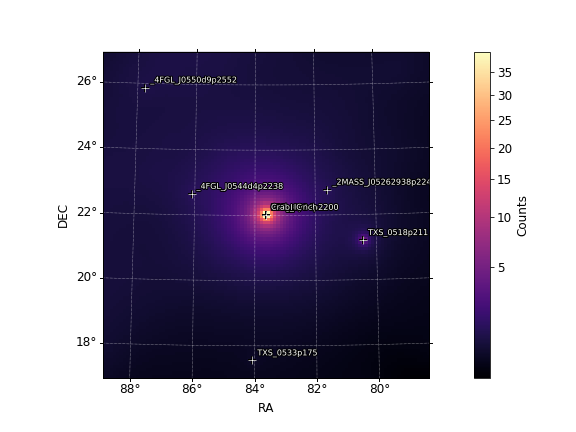

__361686a17a9908dab4859dfebb7a0eb3/test_counts_map_2.000_5.477.png


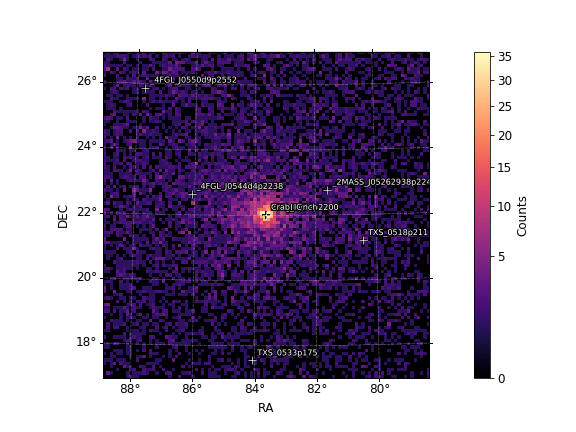

__361686a17a9908dab4859dfebb7a0eb3/test_counts_spectrum.png


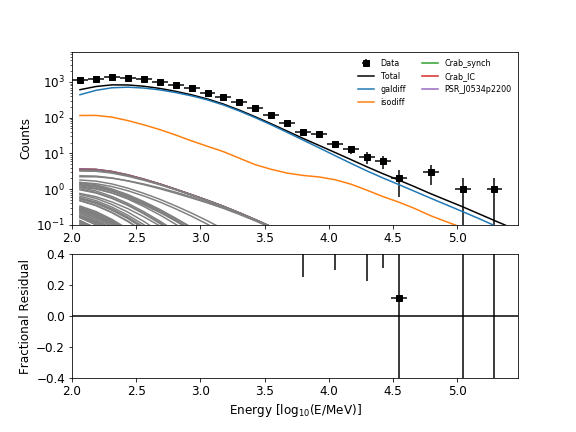

__361686a17a9908dab4859dfebb7a0eb3/test_counts_map_yproj_2.000_5.477.png


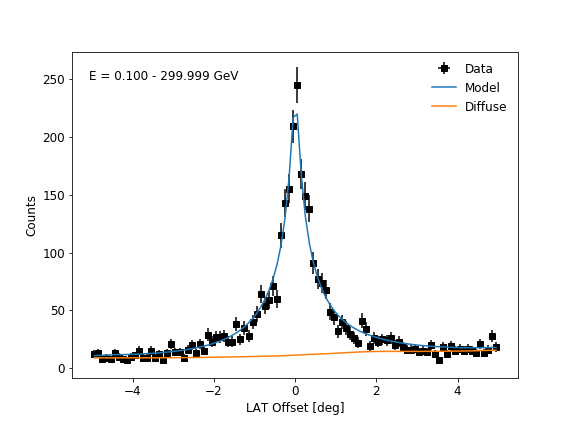

__361686a17a9908dab4859dfebb7a0eb3/test_counts_map_xproj_2.000_5.477.png


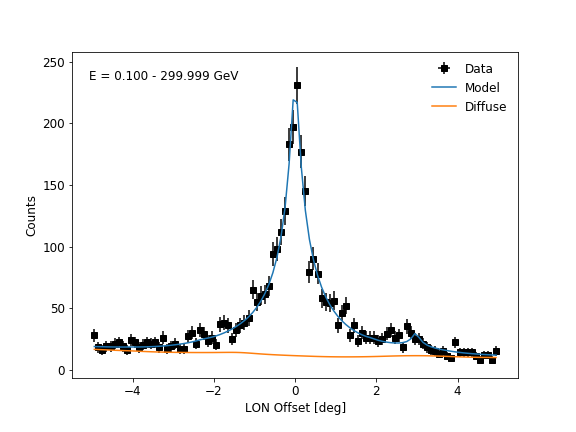

In [18]:
# All the plots are saved in the output directory as png files:
pngs=glob.glob("%s/*png" % fermipy_output_directory)
for png in pngs:
    print png
    my_image=Image(png)
    display(my_image)

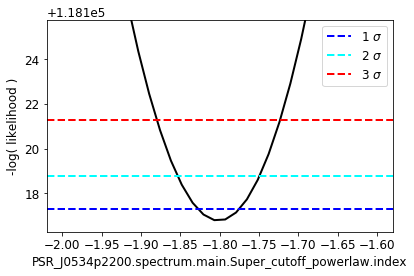

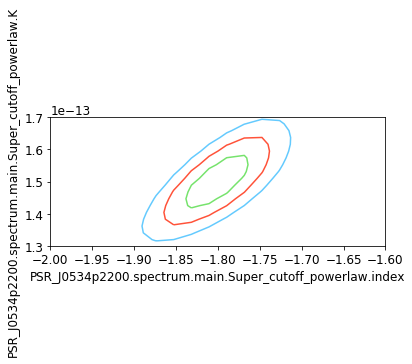

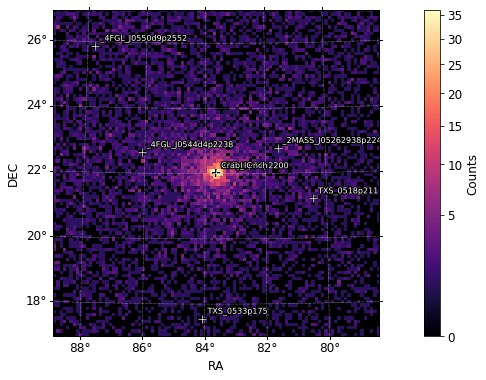

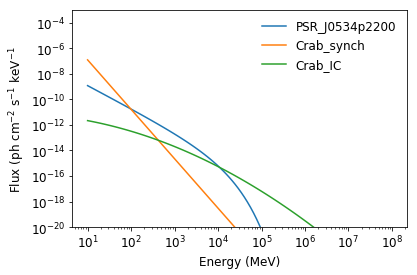

In [19]:
# We can also plot the resulting model:
energies=sp.logspace(1,8,100) *u.MeV
fig=plt.figure()
src_to_plot=['Crab','PSR_J0534p2200']
# Now loop over all point sources and plot them
for source_name, point_source in model.point_sources.iteritems():
    for src in src_to_plot: 
        if src in source_name: 
            # Plot the sum of all components for this source

            plt.loglog(energies, point_source(energies),label=source_name)
            # If there is more than one component, plot them also separately

            if len(point_source.components) > 1:

                for component_name, component in point_source.components.iteritems():
                    plt.loglog(energies,component.shape(energies),'--',label="%s of %s" %(component_name, source_name))
    
# Add a legend
plt.legend(loc=0,frameon=False)

plt.xlabel("Energy (MeV)")
plt.ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$")
plt.ylim([1e-20,1e-3])
plt.show()

In [20]:
# We can now do a bayesian analysis
# This will set priors based on the current defined min-max (log-uniform or uniform)

model.PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.K.set_uninformative_prior(Log_uniform_prior)
model.PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index.set_uninformative_prior(Uniform_prior)
model._2MASS_J05262938p2247232.spectrum.main.Powerlaw.K.set_uninformative_prior(Log_uniform_prior)
model._4FGL_J0544d4p2238.spectrum.main.Powerlaw.K.set_uninformative_prior(Log_uniform_prior)

In [21]:
#It's better to remove the output rirectory,...
shutil.rmtree(fermipy_output_directory)
bayes = BayesianAnalysis(model, data)


Found Galactic template for IRF. P8R2_SOURCE_V6: /Users/omodei/miniconda/envs/threeML/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



2020-04-17 13:09:32 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.17.3 
ScienceTools version unknown



Found Isotropic template for irf P8R2_SOURCE_V6: /Users/omodei/miniconda/envs/threeML/share/fermitools/refdata/fermi/galdiffuse/iso_P8R2_SOURCE_V6_v06.txt


2020-04-17 13:09:39 INFO    GTAnalysis.setup(): Running setup.
2020-04-17 13:09:39 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2020-04-17 13:09:39 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2020-04-17 13:09:39 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_PH00.fits outfile=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/__361686a17a9908dab4859dfebb7a0eb3/ft1_00.fits ra=83.6330909547 dec=22.0144947866 rad=7.57106781187 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=100.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2020-04-17 13:09:40 INFO    GTBinnedAnalysis.run_gtapp(): 
2020-04-17 13:09:40 INFO    GTBinnedAnalysis.run_gtapp(): WARNING: version mismatch between CFITSIO header (v3.43) and linked library (v3.41

2020-04-17 13:11:10 INFO    GTBinnedAnalysis.run_gtapp(): Using evtype=3 (i.e., FRONT/BACK irfs)
2020-04-17 13:11:10 INFO    GTBinnedAnalysis.run_gtapp(): ResponseFunctions::load: IRF used: P8R2_SOURCE_V6
2020-04-17 13:11:10 INFO    GTBinnedAnalysis.run_gtapp(): event_types:  0  1
2020-04-17 13:11:10 INFO    GTBinnedAnalysis.run_gtapp(): Computing binned exposure map....................!
2020-04-17 13:11:10 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtexpcube2. Execution time: 1.48 s
2020-04-17 13:11:10 INFO    GTBinnedAnalysis.run_gtapp(): Running gtsrcmaps.
2020-04-17 13:11:10 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtsrcmaps scfile=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/Crab_data/L2004151817038D8991BF39_SC00.fits sctable="SC_DATA" expcube=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/__361686a17a9908dab4859dfebb7a0eb3/ltcube_00.fits cmap=/Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/threeML/examples/

2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named NVSS_J060835p114942
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named _4FGL_J0620d4p1445
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named MG2_J044950p3026
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named _4FGL_J0445d7p1535
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named PKS_0506p101
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named TXS_0628p203
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named NVSS_J045804p115142
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named B2_0437p27B
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named PMN_J0517p0858
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named TXS_0516p087
2020-04-17 13:12:15 INFO    GTBinnedAna

2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for Crab_synch 29....................!
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0501p3048 29....................!
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0515p1527 29....................!
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0529p0934 29....................!
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0549p3258 29....................!
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0555p0304 29....................!
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0611p2803 29....................!
2020-04-17 13:12:15 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for GB6_J0614p2426 29....................!
2020-04-17 13:12:15 INFO    

2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0506p196 29....................!
2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0516p087 29....................!
2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0518p211 29....................!
2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0533p175 29....................!
2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0536p145 29....................!
2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for TXS_0628p203 29....................!
2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for _1ES_0647p250 29....................!
2020-04-17 13:15:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for _1RXS_J044127d8p150455 29....................!
2020-04-17 13:15:30 INFO    G

2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for TXS_0518p211          : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for TXS_0533p175          : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for NVSS_J053855p164612   : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0550d9p2552    : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0534d2p2751    : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for Sim_147               : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for _3C_138               : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for MG2_J060149p2324      : ['Prefactor']
2020-04-17 13:15:41 INFO    GTAnalysis.free_source(): Fixing parameters for TXS_0506p196

2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0618d7p1211    : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for MG2_J050234p3436      : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for OG_050                : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for PSR_J0633p1746        : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for TXS_0437p145          : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0436d9p2915    : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for _4FGL_J0540d2p0655    : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for PKS_0446p11           : ['Prefactor']
2020-04-17 13:15:43 INFO    GTAnalysis.free_source(): Fixing parameters for TXS_0429p174

In [22]:
# Sample with emcee
# Note that n_samples is the number of samples *per walker*, so you will get n_samples * n_walers samples
# at the end
bayes.set_sampler('emcee')
n_walkers = 10
burn_in = 10
n_samples = 500

bayes.sampler.setup(n_iterations=n_samples,n_burn_in=burn_in,n_walkers=n_walkers )

res = bayes.sample()

100%|██████████| 500/500 [01:20<00:00,  5.66it/s]



Mean acceptance fraction: 0.4926

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
PSR_J0534p2200...K,(1.48 -0.05 +0.06) x 10^-13,1 / (cm2 keV s)
PSR_J0534p2200...index,-1.808 -0.027 +0.028,
_2MASS_J05262938p2247232.spectrum.main.Powerlaw.K,(5 +/- 4) x 10^-17,1 / (cm2 keV s)
_4FGL_J0544d4p2238.spectrum.main.Powerlaw.K,(3.8 +/- 2.8) x 10^-16,1 / (cm2 keV s)



Values of -log(posterior) at the minimum:



,-log(posterior)
LAT,-118070.060871
total,-118070.060871



Values of statistical measures:



,statistical measures
AIC,236138.121743
BIC,236140.121743
DIC,236148.971312
PDIC,2.227674


In [23]:
this_K = bayes.results.get_variates('PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.K')
print(this_K.highest_posterior_density_interval(cl=.68))
print(this_K.highest_posterior_density_interval(cl=.95))
this_idx = bayes.results.get_variates('PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index')
print(this_idx.highest_posterior_density_interval(cl=.68))
print(this_idx.highest_posterior_density_interval(cl=.95))

(1.4228088296009772e-13, 1.5256797923537339e-13)
(1.3882249761578172e-13, 1.5912413671554906e-13)
(-1.8333046992098359, -1.7791887040484815)
(-1.8558650036372575, -1.7567041089023681)


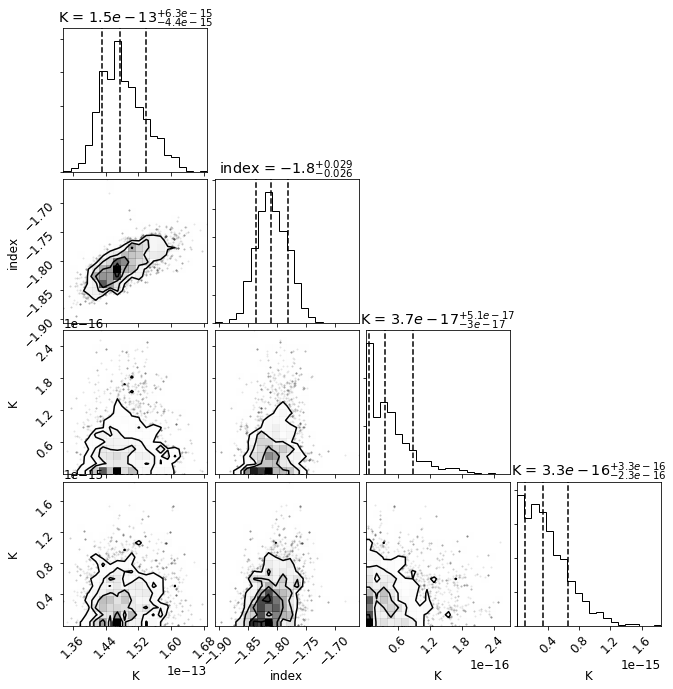

In [24]:
# (red lines in the marginal distributions are the priors)
corner_figure = bayes.results.corner_plot()
plt.show()